In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv("wine-reviews/winemag-data_first150k.csv")

plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif']=['SimHei']

# 1.对标称属性统计每个可能取值的频数

In [82]:
data.country.value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [83]:
data.province.value_counts()

California                                44508
Washington                                 9750
Tuscany                                    7281
Bordeaux                                   6111
Northern Spain                             4892
Mendoza Province                           4742
Oregon                                     4589
Burgundy                                   4308
Piedmont                                   4093
Veneto                                     3962
South Australia                            3004
Sicily & Sardinia                          2545
New York                                   2428
Northeastern Italy                         1982
Loire Valley                               1786
Alsace                                     1680
Marlborough                                1655
Southwest France                           1601
Central Italy                              1530
Southern Italy                             1439
Champagne                               

In [84]:
data.region_2.value_counts()

Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: region_2, dtype: int64

In [85]:
data.variety.value_counts()

Chardonnay                       14482
Pinot Noir                       14291
Cabernet Sauvignon               12800
Red Blend                        10062
Bordeaux-style Red Blend          7347
Sauvignon Blanc                   6320
Syrah                             5825
Riesling                          5524
Merlot                            5070
Zinfandel                         3799
Sangiovese                        3345
Malbec                            3208
White Blend                       2824
Rosé                              2817
Tempranillo                       2556
Nebbiolo                          2241
Portuguese Red                    2216
Sparkling Blend                   2004
Shiraz                            1970
Corvina, Rondinella, Molinara     1682
Rhône-style Red Blend             1505
Barbera                           1365
Pinot Gris                        1365
Cabernet Franc                    1363
Sangiovese Grosso                 1346
Pinot Grigio             

# 2.对数值属性求最大/最小/均值/中位数/四分位数/缺失值个数

In [86]:
print("------数值属性points------")
print("最大值：",max(data.points))
print("最小值：",min(data.points))
print("均　值：",data.points.mean())
print("中位数：",data.points.median())
print("四分位数：",data.points.quantile(.25),data.points.quantile(.5),data.points.quantile(.75))
print("缺失值数：",data.points.isnull().sum())

------数值属性points------
最大值： 100
最小值： 80
均　值： 87.8884184721394
中位数： 88.0
四分位数： 86.0 88.0 90.0
缺失值数： 0


In [87]:
print("------数值属性price------")
print("最大值：",max(data.price))
print("最小值：",min(data.price))
print("均　值：",data.price.mean())
print("中位数：",data.price.median())
print("四分位数：",data.price.quantile(.25),data.price.quantile(.5),data.price.quantile(.75))
print("缺失值数：",data.price.isnull().sum())

------数值属性price------
最大值： 2300.0
最小值： 4.0
均　值： 33.13148249353299
中位数： 24.0
四分位数： 16.0 24.0 40.0
缺失值数： 13695


# 3.对数值属性绘制直方图/QQ图/盒图

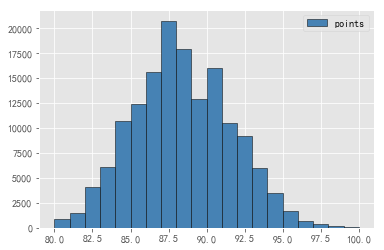

In [88]:
plt.hist(data.points,bins = 20,color = 'steelblue',edgecolor = 'k',label = 'points')
plt.legend()
plt.show()

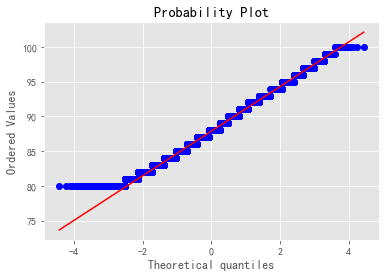

In [89]:
from scipy import stats
stats.probplot(data.points, dist="norm", plot=plt)
plt.show()

### 根据上方QQ图可知，数值属性points服从正太分布；根据下面的盒图可以看出，属性points存在若干数值较大的离群值

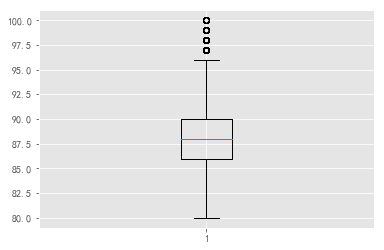

In [90]:
plt.boxplot(data.points)
plt.show()

# 4.处理属性price的缺失值

## 4.1将缺失部分剔除

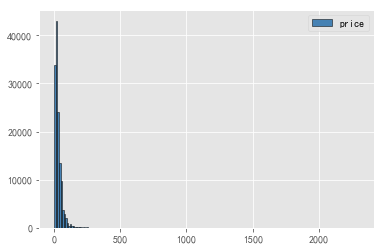

13695 0


In [91]:
drop_data=data.dropna(subset=['price'])
plt.hist(drop_data.price,bins = 200,color = 'steelblue',edgecolor = 'k',label = 'price')
plt.legend()
plt.show()
print(data.price.isnull().sum(),drop_data.price.isnull().sum())

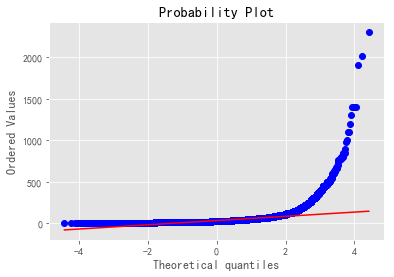

In [92]:
stats.probplot(drop_data.price, dist="norm", plot=plt)
plt.show()

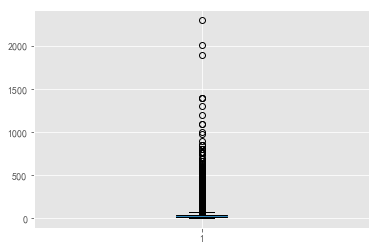

In [93]:
plt.boxplot(drop_data.price)
plt.show()

## 4.2用最高频率值来填补缺失值

### 由于price的数据大部分聚集在较小一侧，所以选择中值替换缺失值

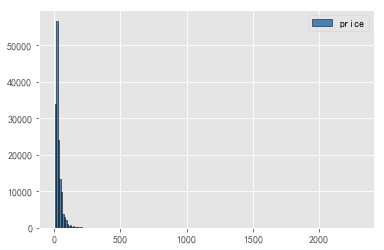

13695 0


In [94]:
fill_median_data=data.price.fillna(data.price.median())
plt.hist(fill_median_data,bins = 200,color = 'steelblue',edgecolor = 'k',label = 'price')
plt.legend()
plt.show()
print(data.price.isnull().sum(),fill_median_data.isnull().sum())

## 4.3 通过属性的相关关系来填补缺失值

### 把属性price缺失值作为新的label，建立模型得到预测值，然后进行填充，这里采用随机森林RF进行拟合。

In [95]:
from sklearn.ensemble import RandomForestRegressor

print(data['price'].isnull().sum())
data1=data.copy(deep=True)
price_data=data[['price','points']]
known_price = price_data[price_data['price'].notnull()].values
unknown_price = price_data[price_data['price'].isnull()].values
y = known_price[:, 0]
X = known_price[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(X, y)
predictedPrice = rfr.predict(unknown_price[:, 1:])
data.loc[(data['price'].isnull()), 'price' ] = predictedPrice
print(data['price'].isnull().sum(),data1.price.isnull().sum())

13695
0 13695


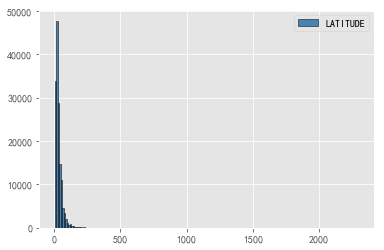

In [47]:
plt.hist(data['price'],bins = 200,color = 'steelblue',edgecolor = 'k',label = 'LATITUDE')
plt.legend()
plt.show()

## 4.4通过数据对象之间的相似性来填补缺失值

### 填充近邻的数据，先利用knn计算临近的k个数据，然后填充他们的均值。

In [ ]:
from fancyimpute import KNN
data_knn=np.array(data1[['points','price']])
fill_knn_data=pd.DataFrame(KNN(k=3).fit_transform(data_knn))